In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler #scaling de los datos entre 0 y 1
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer
plt.style.use('seaborn')
plt.style.use('matplotlibrc.py')

Using TensorFlow backend.


In [2]:
seed = 7
np.random.seed(seed)

In [3]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [4]:
def graph_predictions(l,df_original,y_train_pr,y_test_pr):
    plt.plot(df_original) 
    months_tr = np.arange(l,len(y_train_pr)+l) #meses de training
    months_ts = np.arange(len(y_train_pr)+(2*l)+1,len(df_original)-1) #meses de testing
    plt.plot(months_tr,y_train_pr,label='train') #grafico de train results
    plt.plot(months_ts,y_test_pr,label='test') #grafico de test results
    plt.xlabel('Meses')
    plt.ylabel('Pasajeros')
    plt.legend()
    plt.savefig('bsas_6.pdf')
    plt.show()

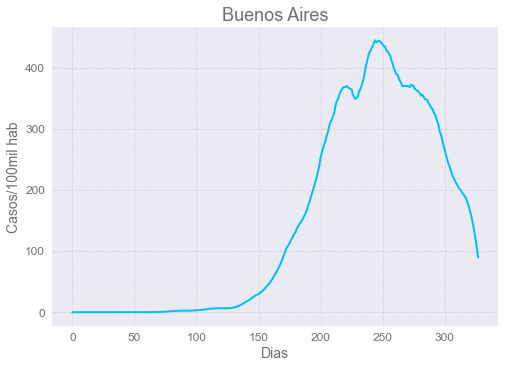

In [5]:
file_dir = 'Datos/RiesgoBuenosAires'
data = pd.read_csv(file_dir,sep=",",quotechar='"',na_values=[''])
data = data["incidenciaAcum14d"]
df = pd.DataFrame(data)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.title('Buenos Aires')
plt.plot(df)
df = df.to_numpy()
df1 = df[-20:-10]
df = df[:-20]
df_original = np.copy(df)
df = df.flatten()
scaler = MinMaxScaler(feature_range=(0, 1))

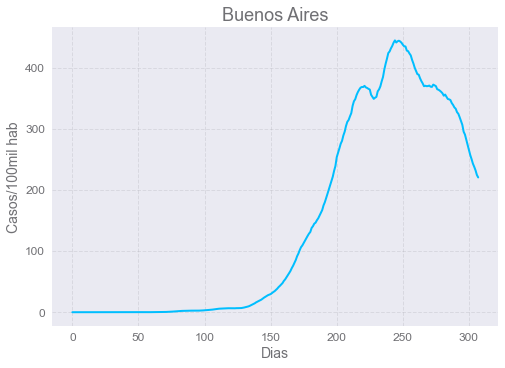

In [6]:
plt.plot(df)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.title('Buenos Aires')
plt.savefig('bsas_1.pdf')

In [7]:
total_size = df.shape[0]
train_size = int(0.8*total_size)
test_size = total_size - train_size
train_data = df[:-test_size]
test_data = df[-test_size:]

In [8]:
print('Data train size: ',train_size)
print('Data test size: ',test_size)

Data train size:  246
Data test size:  62


In [9]:
tw = 3
train_data_scaled = scaler.fit_transform(train_data.reshape(-1, 1))
x_train, y_train = create_dataset(train_data_scaled, tw)
x_train = x_train.reshape(x_train.shape[0],1,x_train.shape[1])
test_data_scaled = scaler.transform(test_data.reshape(-1, 1))
x_test, y_test = create_dataset(test_data_scaled, tw)
x_test = x_test.reshape(x_test.shape[0],1,x_test.shape[1])

In [10]:
model = keras.Sequential()
model.add(keras.layers.LSTM(units=16,activation='relu',input_shape=(1,tw)))
model.add(keras.layers.Dense(units=1))
model.compile(optimizer='adam',loss=keras.losses.MSE,metrics=['mse']) 
model.summary()
history = model.fit(x_train, y_train,epochs=500,validation_data=(x_test,y_test),batch_size=16,verbose=2) 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                1280      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 1,297
Trainable params: 1,297
Non-trainable params: 0
_________________________________________________________________
Train on 242 samples, validate on 58 samples
Epoch 1/500
 - 1s - loss: 0.1440 - mse: 0.1440 - val_loss: 0.6353 - val_mse: 0.6353
Epoch 2/500
 - 0s - loss: 0.1310 - mse: 0.1310 - val_loss: 0.5857 - val_mse: 0.5857
Epoch 3/500
 - 0s - loss: 0.1203 - mse: 0.1203 - val_loss: 0.5380 - val_mse: 0.5380
Epoch 4/500
 - 0s - loss: 0.1115 - mse: 0.1115 - val_loss: 0.4947 - val_mse: 0.4947
Epoch 5/500
 - 0s - loss: 0.1033 - mse: 0.1033 - val_loss: 0.4607 - val_mse: 0.4607
Epoch 6/500
 - 0s - loss: 0.0966 - mse: 0.0966 - 

Epoch 90/500
 - 0s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 91/500
 - 0s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 92/500
 - 0s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 93/500
 - 0s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0042 - val_mse: 0.0042
Epoch 94/500
 - 0s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 95/500
 - 0s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 96/500
 - 0s - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 97/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0037 - val_mse: 0.0037
Epoch 98/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0039 - val_mse: 0.0039
Epoch 99/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0038 - val_mse: 0.0038
Epoch 100/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 101/500
 - 0s - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0

Epoch 180/500
 - 0s - loss: 3.4037e-04 - mse: 3.4037e-04 - val_loss: 0.0020 - val_mse: 0.0020
Epoch 181/500
 - 0s - loss: 3.3289e-04 - mse: 3.3289e-04 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 182/500
 - 0s - loss: 3.2042e-04 - mse: 3.2042e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 183/500
 - 0s - loss: 3.1529e-04 - mse: 3.1529e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 184/500
 - 0s - loss: 3.0599e-04 - mse: 3.0599e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 185/500
 - 0s - loss: 2.9366e-04 - mse: 2.9366e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 186/500
 - 0s - loss: 3.0220e-04 - mse: 3.0220e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 187/500
 - 0s - loss: 2.8327e-04 - mse: 2.8327e-04 - val_loss: 0.0019 - val_mse: 0.0019
Epoch 188/500
 - 0s - loss: 2.6898e-04 - mse: 2.6898e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 189/500
 - 0s - loss: 2.6009e-04 - mse: 2.6009e-04 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 190/500
 - 0s - loss: 2.5374e-04 - mse: 2.5374e-04 - v

 - 0s - loss: 6.3815e-05 - mse: 6.3815e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 268/500
 - 0s - loss: 5.8704e-05 - mse: 5.8704e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 269/500
 - 0s - loss: 5.6404e-05 - mse: 5.6404e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 270/500
 - 0s - loss: 5.7900e-05 - mse: 5.7900e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 271/500
 - 0s - loss: 5.8922e-05 - mse: 5.8922e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 272/500
 - 0s - loss: 5.8023e-05 - mse: 5.8023e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 273/500
 - 0s - loss: 5.7160e-05 - mse: 5.7160e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 274/500
 - 0s - loss: 5.7344e-05 - mse: 5.7344e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 275/500
 - 0s - loss: 5.6645e-05 - mse: 5.6645e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 276/500
 - 0s - loss: 5.9726e-05 - mse: 5.9726e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 277/500
 - 0s - loss: 5.7098e-05 - mse: 5.7098e-05 - val_loss: 0.001

Epoch 355/500
 - 0s - loss: 5.5286e-05 - mse: 5.5286e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 356/500
 - 0s - loss: 5.4051e-05 - mse: 5.4051e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 357/500
 - 0s - loss: 5.6248e-05 - mse: 5.6248e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 358/500
 - 0s - loss: 5.7169e-05 - mse: 5.7169e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 359/500
 - 0s - loss: 5.4240e-05 - mse: 5.4240e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 360/500
 - 0s - loss: 5.5076e-05 - mse: 5.5076e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 361/500
 - 0s - loss: 5.4474e-05 - mse: 5.4474e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 362/500
 - 0s - loss: 5.6770e-05 - mse: 5.6770e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 363/500
 - 0s - loss: 5.4133e-05 - mse: 5.4133e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 364/500
 - 0s - loss: 5.3777e-05 - mse: 5.3777e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 365/500
 - 0s - loss: 5.5452e-05 - mse: 5.5452e-05 - v

 - 0s - loss: 6.7865e-05 - mse: 6.7865e-05 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 442/500
 - 0s - loss: 7.4622e-05 - mse: 7.4622e-05 - val_loss: 8.8559e-04 - val_mse: 8.8559e-04
Epoch 443/500
 - 0s - loss: 5.5563e-05 - mse: 5.5563e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 444/500
 - 0s - loss: 5.2460e-05 - mse: 5.2460e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 445/500
 - 0s - loss: 5.0921e-05 - mse: 5.0921e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 446/500
 - 0s - loss: 5.7396e-05 - mse: 5.7396e-05 - val_loss: 8.1704e-04 - val_mse: 8.1704e-04
Epoch 447/500
 - 0s - loss: 6.6949e-05 - mse: 6.6949e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 448/500
 - 0s - loss: 6.2429e-05 - mse: 6.2429e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 449/500
 - 0s - loss: 5.4140e-05 - mse: 5.4140e-05 - val_loss: 7.5488e-04 - val_mse: 7.5488e-04
Epoch 450/500
 - 0s - loss: 1.0791e-04 - mse: 1.0791e-04 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 451/500
 - 0s - loss: 6.4744e-05 - mse: 6.47

In [11]:
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [12]:
print('train mse squared:',mean_squared_error(y_train,train_predict))
print('test mse squared:',mean_squared_error(y_test,test_predict)) 

train mse squared: 5.2698619336291456e-05
test mse squared: 0.0008963045856531412


In [13]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

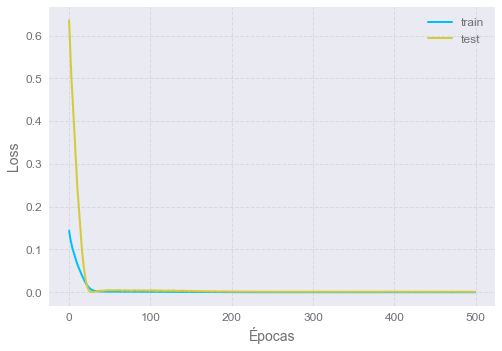

In [14]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.legend(fontsize=12)
plt.savefig('bsas_2.pdf')

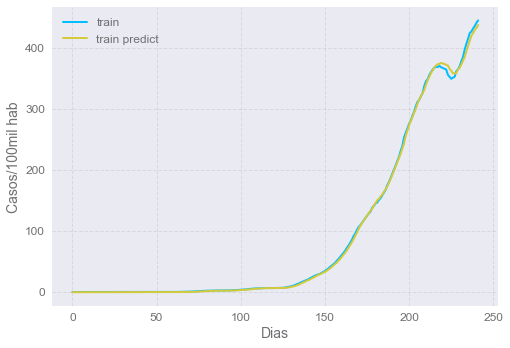

In [15]:
plt.plot(scaler.inverse_transform(y_train.reshape(-1,1)),label='train')
plt.plot(train_predict,label='train predict')
plt.legend(fontsize=12)
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.savefig('bsas_3.pdf')

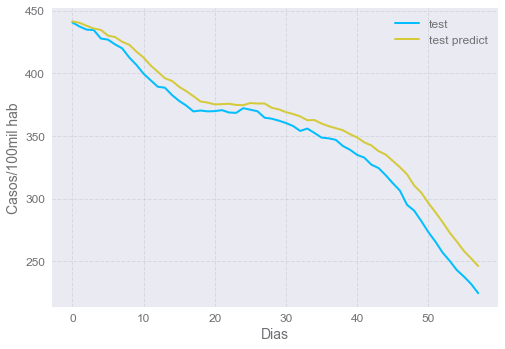

In [16]:
plt.plot(scaler.inverse_transform(y_test.reshape(-1,1)),label='test')
plt.plot(test_predict,label='test predict')
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.legend(fontsize=12)
plt.savefig('bsas_4.pdf')

In [17]:
print('train mse squared:',mean_squared_error(scaler.inverse_transform(y_train.reshape(-1,1)),train_predict))
print('test mse squared:',mean_squared_error(scaler.inverse_transform(y_test.reshape(-1,1)),test_predict)) 

train mse squared: 10.407305148093084
test mse squared: 177.00854063382243


In [18]:
print(x_train.shape)

(242, 1, 3)


In [19]:
n = len(test_data_scaled)
lag = tw
x_input=test_data_scaled[n-lag:].reshape(1,-1)
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
lst_output=[]
n_steps=lag
i=0

while(i<10): 
    if(len(temp_input)>lag):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, 1, lag))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, 1, lag))
        yhat = model.predict(x_input, verbose=0)
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1

1 day output [[0.5398438]]
2 day output [[0.5495114]]
3 day output [[0.5655715]]
4 day output [[0.5796623]]
5 day output [[0.5928551]]
6 day output [[0.60686904]]
7 day output [[0.62065464]]
8 day output [[0.6341418]]
9 day output [[0.64758486]]


In [20]:
lst_output = scaler.inverse_transform(lst_output)

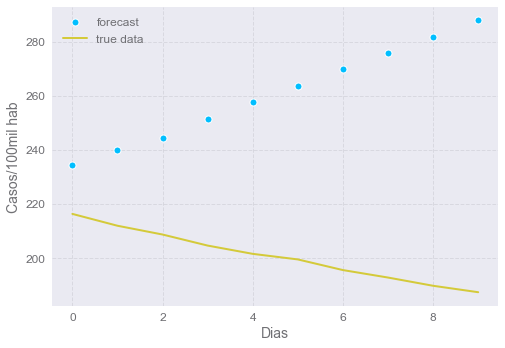

In [21]:
plt.plot(lst_output,'o',label='forecast')
plt.plot(df1,label='true data')
plt.xlabel('Dias')
plt.ylabel('Casos/100mil hab')
plt.legend(fontsize=12)
plt.savefig('bsas_5.pdf')

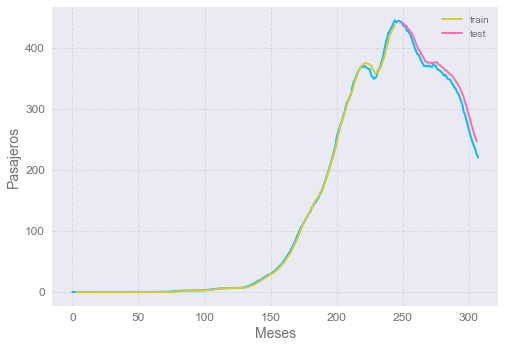

In [22]:
graph_predictions(tw,df_original,train_predict,test_predict)